In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# 배치크기 * 채널(1: 그레이스 케일, 3: 컬러) * 높이 * 너비
inputs = torch.Tensor(1,1,28,28)
print(inputs.shape)

torch.Size([1, 1, 28, 28])


In [3]:
# 첫번째 Conv2D
conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same')
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [4]:
# 첫 번째 MaxPool2D
pool = nn.MaxPool2d(kernel_size=2)
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [5]:
# 두번째 Conv2D
conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size = 3, padding='same')

In [6]:
# 두번째 MaxPool2D

pool = nn.MaxPool2d(kernel_size=2)
out = pool(out)
print(out.shape)

torch.Size([1, 32, 7, 7])


In [7]:
flatten = nn.Flatten()
out = flatten(out)
print(out.shape)

torch.Size([1, 1568])


In [8]:
fc = nn.Linear(1568, 10)  # 원래 3136 들어가야햄
out = fc(out)
print(out.shape)

torch.Size([1, 10])


# CNN MISIST 분류

In [9]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [11]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 135655101.77it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 107580545.14it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 48405527.92it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4904873.52it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

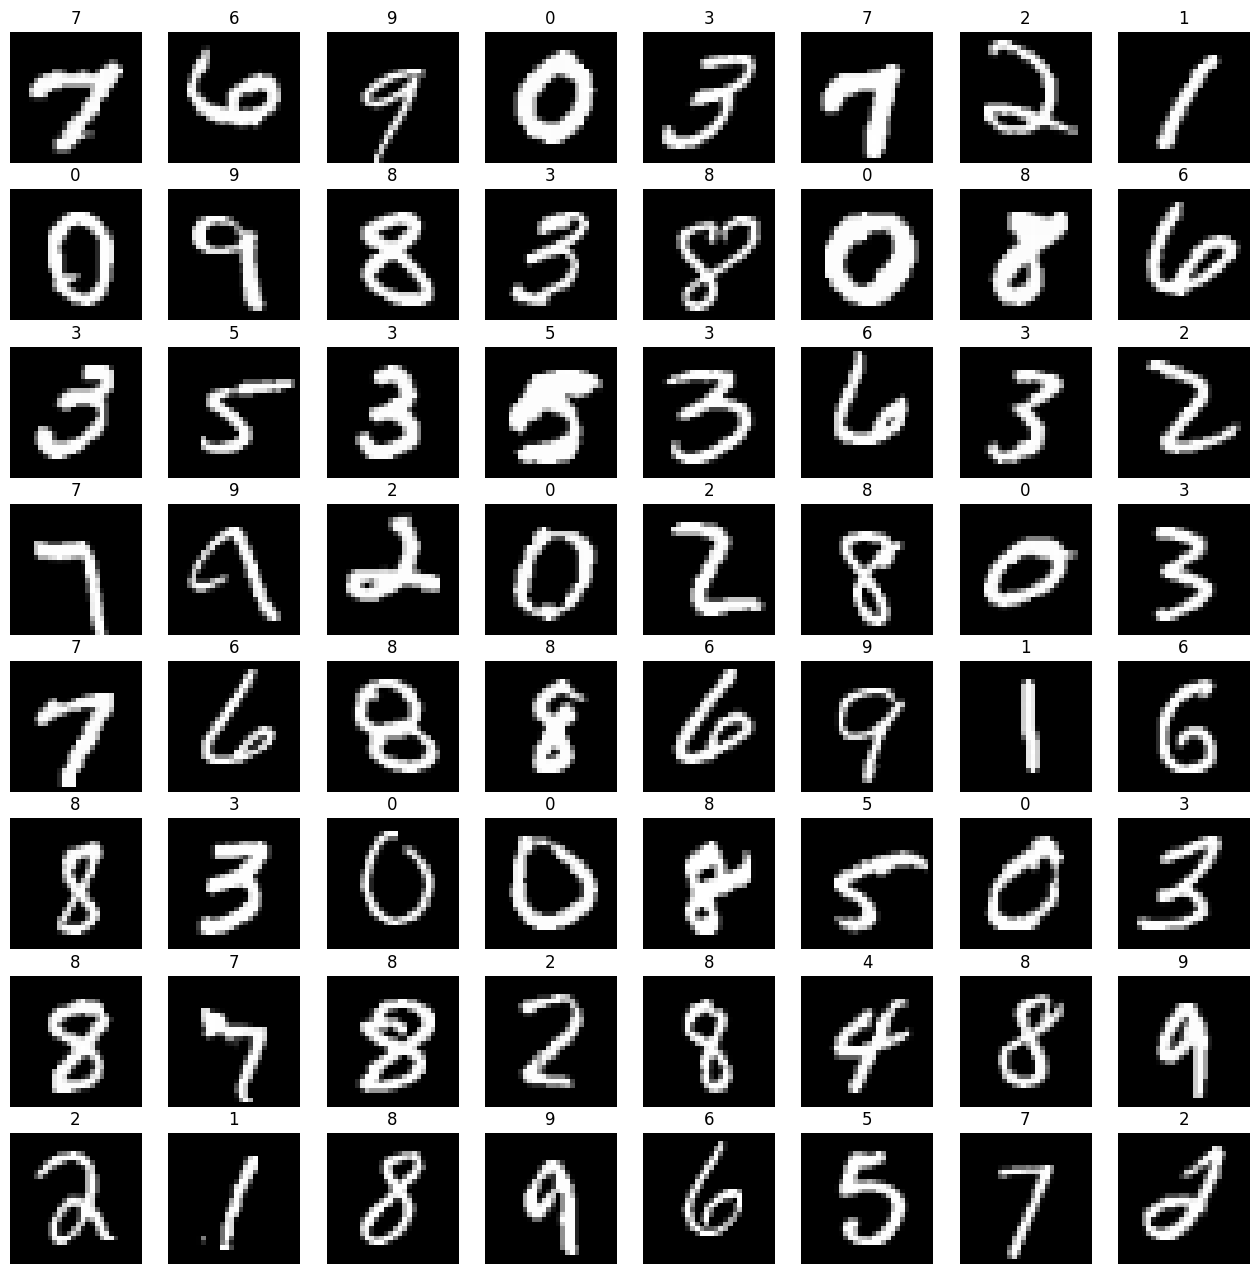

In [14]:
# 데이터로더 만들기
# 8*8 형태로 출력
# batch_size=64, shuffle=True

loader = DataLoader(
    dataset = train_data,
    batch_size= 64,
    shuffle = True
)

imgs, labels = next(iter(loader))

fig, axes = plt.subplots(8,8, figsize=(16,16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((28,28)), cmap='gray')
    ax.set_title(label.item())
    ax.axis('off')

imgs




In [18]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(32, 64, kernel_size=3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(7*7*64, 10)
).to(device)
print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)


In [23]:
# 학습
# optimizer: Adam

# Epoch 1/10    LOSS: 0,180667        Accuracy : 94.62%
# ...
# Epoch 10/10    LOSS: 0,010452        Accuracy : 99.65%


optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 10

for epoch in range(epochs):
  sum_losses = 0
  sum_accs = 0

  for x_batch, y_batch in loader:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)

      y_pred = model(x_batch)
      loss = nn.CrossEntropyLoss()(y_pred, y_batch)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      ssum_losses = sum_losses + loss
      y_prob = nn.Softmax(1)(y_pred)
      y_pred_index = torch.argmax(y_prob, axis=1)

      acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
      sum_accs = sum_accs + acc

  avg_loss = sum_losses / len(loader)
  avg_acc = sum_accs / len(loader)
  print(f'Epoch {epoch+1:4d}/{epochs} LOSS : {avg_loss:.6f} Accuracy:{avg_acc:.2f}%')

Epoch    1/10 LOSS : 0.000000 Accuracy:10.72%
Epoch    2/10 LOSS : 0.000000 Accuracy:10.58%
Epoch    3/10 LOSS : 0.000000 Accuracy:10.76%
Epoch    4/10 LOSS : 0.000000 Accuracy:10.71%
Epoch    5/10 LOSS : 0.000000 Accuracy:10.69%
Epoch    6/10 LOSS : 0.000000 Accuracy:10.42%
Epoch    7/10 LOSS : 0.000000 Accuracy:10.68%
Epoch    8/10 LOSS : 0.000000 Accuracy:10.48%
Epoch    9/10 LOSS : 0.000000 Accuracy:10.49%
Epoch   10/10 LOSS : 0.000000 Accuracy:10.50%


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

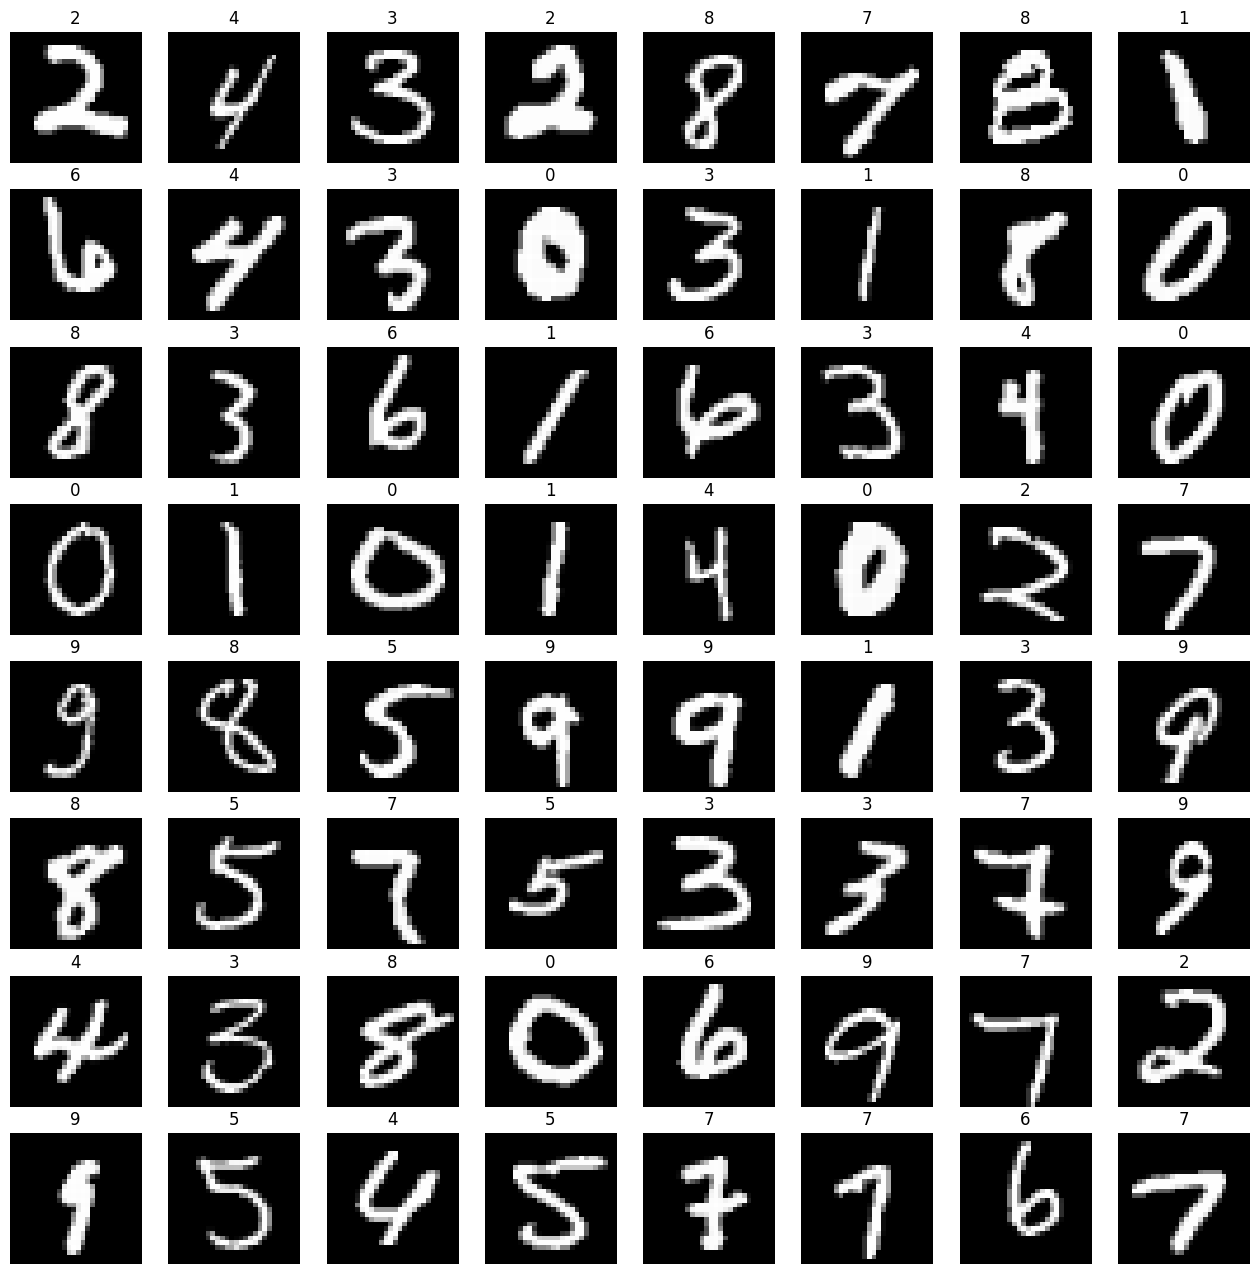

In [25]:
# test_loader를 만들어 데이터 출력
# batch_size = 64 , shuffle=True
# 8*8 형태로 이미지 출력

test_loader = DataLoader(
    dataset = train_data,
    batch_size= 64,
    shuffle = True
)

imgs, labels = next(iter(loader))

fig, axes = plt.subplots(8,8, figsize=(16,16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((28,28)), cmap='gray')
    ax.set_title(label.item())
    ax.axis('off')

imgs


In [27]:
# 테스트 정확도는 98.92%
model.eval() # 모델을 테스트 모드로 전환

sub_accs = 0
for x_batch, y_batch in test_loader:
  x_batch = x_batch.to(device)
  y_batch = y_batch.to(device)

  y_pred = model(x_batch)
  y_prob = nn.Softmax(1)(y_pred)
  y_pred_index = torch.argmax(y_prob, axis=1)

  acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
  sum_accs = sum_accs + acc

avg_loss = sum_losses / len(test_loader)
avg_acc = sum_accs / len(test_loader)
print(f'Epoch {epoch+1:4d}/{epochs} LOSS : {avg_loss:.6f} Accuracy:{avg_acc:.2f}%')

Epoch   10/10 LOSS : 0.000000 Accuracy:30.93%
